In [6]:
import pandas as pd
import numpy as np
import os
import sys 

In [7]:
operators = [ i[:-5] for i in os.listdir('./operator')]

In [8]:
dialogues = {}

def unpack_dialogue(my_dict):
    for keys, values in my_dict.items():
        if keys == 'text':
            return values


for operator in operators:
    dialogue_list = []
    try:
        df = pd.read_json(f'./files/{operator}/dialogue.json').reset_index()
        
        # Assuming dialogue data is directly in the 'dialogue' column
        if 'dialogue' in df.columns:
            for i in range(len(df)):
                dialogue = unpack_dialogue(df.iloc[i]['dialogue'])
                if dialogue is not None:
                    dialogue_list.append(dialogue)
        # If 'dialogue' is not in columns, check if we can process directly
        else:
            for i in range(len(df)):
                dialogue = unpack_dialogue(df.iloc[i])
                if dialogue is not None:
                    dialogue_list.append(dialogue)
                    
        dialogues[operator] = dialogue_list
    except Exception as e:
        print(f"Error processing {operator}: {e}")
    
    

Error processing Muelsyse: File ./files/Muelsyse/dialogue.json does not exist
Error processing Silence the Paradigmatic: File ./files/Silence the Paradigmatic/dialogue.json does not exist
Error processing Typhon: File ./files/Typhon/dialogue.json does not exist
Error processing Ines: File ./files/Ines/dialogue.json does not exist
Error processing Swire the Elegant Wit: File ./files/Swire the Elegant Wit/dialogue.json does not exist
Error processing Jessica the Liberated: File ./files/Jessica the Liberated/dialogue.json does not exist
Error processing Eyjafjalla the Hvít Aska: File ./files/Eyjafjalla the Hvít Aska/dialogue.json does not exist
Error processing Ho'olheyak: File ./files/Ho'olheyak/dialogue.json does not exist
Error processing Executor the Ex Foedere: File ./files/Executor the Ex Foedere/dialogue.json does not exist
Error processing W: File ./files/W/dialogue.json does not exist


In [9]:
dialogue_df = pd.DataFrame.from_dict(dialogues, orient='index')

In [10]:
import pandas as pd
from transformers import pipeline

# Step 1: Combine all quotes into one string per character
dialogue_df['all_text'] = dialogue_df.apply(lambda row: ' '.join([str(x) for x in row if pd.notnull(x)]), axis=1)

# Step 2: Setup zero-shot classifier
# Using a more efficient and accurate model suitable for 16GB VRAM
classifier = pipeline("zero-shot-classification", 
                     model="facebook/bart-large-mnli",
                     device=0)  # Use GPU if available with device=0

# MBTI types
mbti_labels = ['INTJ', 'INTP', 'ENTJ', 'ENTP',
               'INFJ', 'INFP', 'ENFJ', 'ENFP',
               'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ',
               'ISTP', 'ISFP', 'ESTP', 'ESFP']

# Step 3: Predict for each character
results = {}

for character, text in dialogue_df['all_text'].items():
    prediction = classifier(text, mbti_labels, multi_label=False)
    best_label = prediction['labels'][0]
    results[character] = best_label

# Step 4: View Results
for character, mbti in results.items():
    print(f"{character}: {mbti}")


Device set to use cuda:0


Lee: ESTJ
Reed the Flame Shadow: ISFP
Goldenglow: INTP
Skadi the Corrupting Heart: INTP
Pallas: ENFP
Lumen: ESTJ
Magallan: INFP
Fiammetta: ISFJ
Ifrit: ISFP
Pozëmka: INTJ
Shining: INFP
Stainless: ESTP
Surtr: INTJ
Dusk: INTP
Saileach: ISFP
Flametail: INTJ
Schwarz: INFP
Mountain: INTJ
Lin: ISFJ
Hoshiguma: ENFP
Saga: INTJ
Dorothy: ISFJ
Ceobe: ESFP
Ebenholz: ESTP
Eyjafjalla: INFP
Passenger: ISFP
Thorns: ESTP
Gavial the Invincible: ESTP
Phantom: ESFP
Gnosis: ENFP
Mudrock: ISFJ
Siege: INFP
Młynar: ESTP
Kirin R Yato: INFP
SilverAsh: ESFP
Nightingale: ENTP
Blemishine: ESTJ
Mostima: ENFP
Gladiia: INTP
Specter the Unchained: ISFP
Carnelian: ISFJ
Ch'en the Holungday: ENTP
Ash: ENFP
Ling: ISFP
Horn: ISFP
Archetto: INTP
Bagpipe: ESTP
Aak: INTP
Saria: ENFP
Weedy: INFP
Ch'en: INFP
Vigil: ISFP
Nearl the Radiant Knight: ISFJ
Chongyue: ISFP
Fartooth: ENFP
Hellagur: INTJ
Kal'tsit: ENFP
Angelina: ENFP
Irene: ESTP
Nian: ISFP
Rosa: ESFP
Qiubai: INTP
Penance: INTP
Skadi: ENFP
Eunectes: ENFP
Exusiai: ESTP
Mizu

In [11]:
dialogue_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,all_text
Lee,"Sorting files? Whoa, I've suddenly gotten this...","A job? Of course I'm all ears, let's hear it.....",HavingWaai FuandHungaround to keep an eye on t...,It's thanks to your patronage that the agency ...,"What do you think, Dr. {nickname}? Jaye makes ...","Under this heading, you had the third row on t...",Why are the lights all on at this hour... oh? ...,"Everyone's chasing fame and profit, earning an...","Myhexagramsays to avoid going out, so I'll pas...",Busying about can't beat a nice leisurely tea....,...,"Welcome toLee's Detective Agency, do you have ...",Arknights.,None,None,None,None,None,None,None,"Sorting files? Whoa, I've suddenly gotten this..."
Reed the Flame Shadow,There's a lot more I can do for you now–more t...,What would you like to ask? Maybe you want to ...,"It's getting dark. Around this hour, there'd b...",I can't make myself out to be a comrade of you...,"In my spare time? I still like prose, and poet...","Once you've caughtOripathy, living can become ...","Do not fear, but do not disregard. Be light, b...","Many prophecies say similar things–""it is theD...","My mind's not at peace, Doctor. Is my every ch...","Not a word needed... It's always so tranquil, ...",...,"Ah, Doctor. Yes, some things never change.",Arknights.,None,None,None,None,None,None,None,There's a lot more I can do for you now–more t...
Goldenglow,Am I really going to be helpful? Um... alright...,Hmm... your hair is close to coming out of you...,I can't use anything like a compass. No matter...,"You wanna touch my ears? Of course, touch them...",MyArtsare... how do I put it? They affect a lo...,"Static electric pulse theory says... okay, oka...","Welcome~! Oh,Doctor! You finally decided to ge...",My dad told me I should pick up another craft ...,"Before I gotInfected, I was actually in really...","The circuit's grounded... okay, now my hair sh...",...,Hope you have another good day today.,Arknights.,None,None,None,None,None,None,None,Am I really going to be helpful? Um... alright...
Skadi the Corrupting Heart,"As I am now, will my presence inconvenience yo...",You used to think that we could not survive if...,My former colleagueswished to slay me. They re...,This box? This box contains my past... The fra...,Did the past you ever foresee a future like th...,"Your companions,Kal'tsitandAmiya, said that I ...","In the past, before I leftÆgir, my family was ...","I once struggled, I once resisted. What good d...",Am I sick? Or am I still dreaming? I dreamt th...,Dream... What kind of dream will you have? Whe...,...,Doctor... Come to me.,Arknights.,None,None,None,None,None,None,None,"As I am now, will my presence inconvenience yo..."
Pallas,Become an assistant? If the job is similar to ...,"Ugh... Ehem, I must not drink, drink so much n...",The city is a grand sight during the festivals...,To think that there were so many like-minded c...,"After contractingOripathy, I moved to a small ...","Simply light the flames of resistance, and it ...","Is that so.Vulcan, once the champion of weapon...",The stories of Minoan heroes... There exist bo...,To be oppressed for so long that one becomes n...,I am used to thinking while standing upright. ...,...,"Are you rested, Doctor?",Arknights.,None,None,None,None,None,None,None,Become an assistant? If the job is similar to ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mizuki,Dr.Kal'tsittold me if you ever chose to place ...,"Fine dining, comics, games, and the people who...","Ah, Doctor, you came at just the right time. Q...","This one, huh? It's aclassic arcade gamefromHi...",A strong sense of justice? You have the wrong ...,Though I don't really understand your rational...,"Sometimes, it feels like there's something on ...","Doctor, what does it feel like to take charge ...","I sometimes think, since the food we eat and t...","It's time to take a little break, Doctor. Come...",...,"Did you miss m

KNN Accuracy: 0.05

Classification Report:
              precision    recall  f1-score   support

        ENFP       0.11      0.50      0.18         2
        ENTP       0.00      0.00      0.00         1
        ESFP       0.00      0.00      0.00         2
        ESTJ       0.00      0.00      0.00         2
        ESTP       0.00      0.00      0.00         2
        INFP       0.00      0.00      0.00         5
        INTJ       0.00      0.00      0.00         3
        INTP       0.00      0.00      0.00         1
        ISFJ       0.00      0.00      0.00         2
        ISFP       0.00      0.00      0.00         2

    accuracy                           0.05        22
   macro avg       0.01      0.05      0.02        22
weighted avg       0.01      0.05      0.02        22



/home/semicolon/miniconda3/envs/rapidsai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/semicolon/miniconda3/envs/rapidsai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/semicolon/miniconda3/envs/rapidsai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

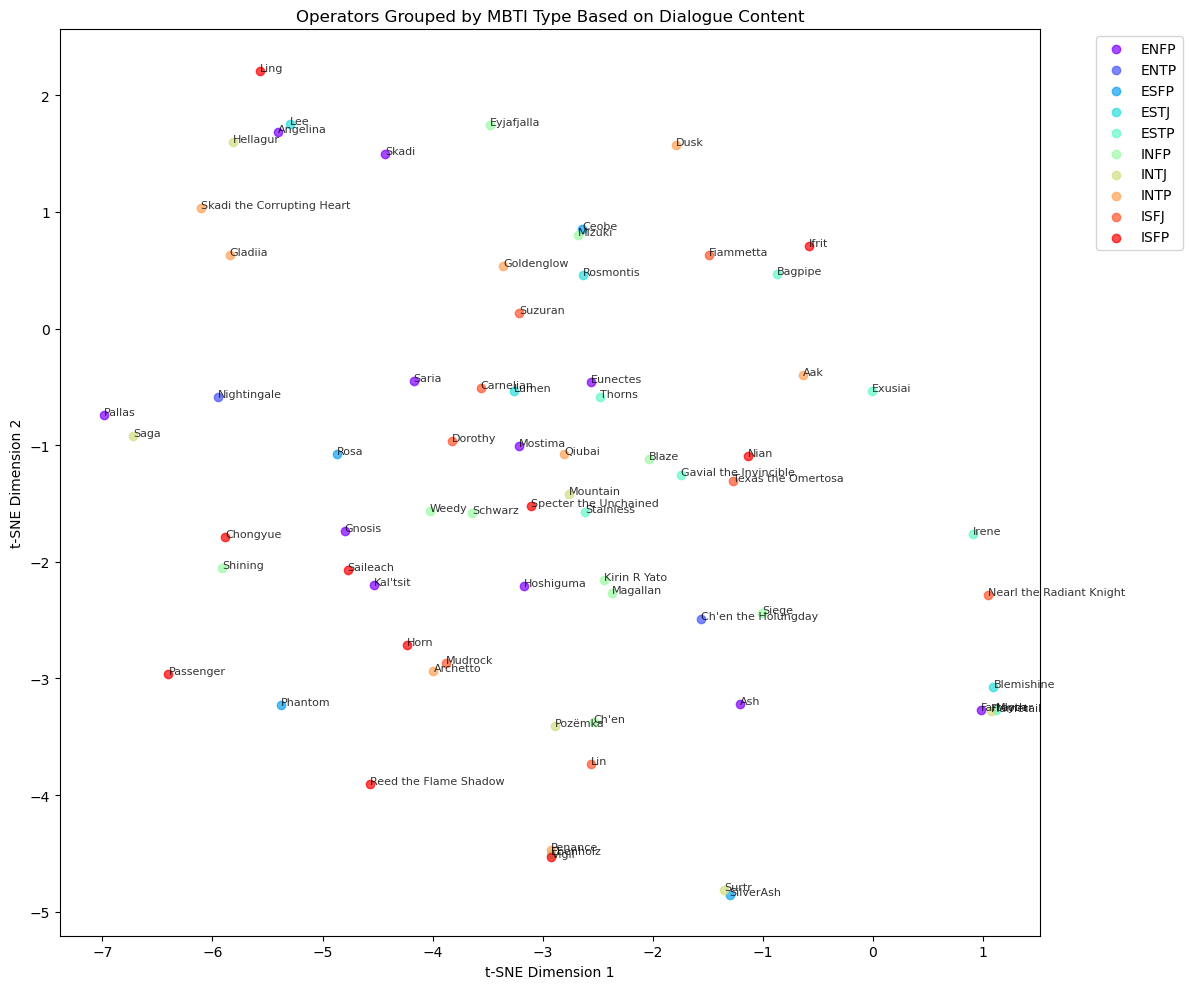

In [12]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

# Create features from dialogue text
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(dialogue_df['all_text'].values)

# Encode MBTI types as labels
label_encoder = LabelEncoder()
mbti_encoded = label_encoder.fit_transform([results[op] for op in dialogue_df.index])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, mbti_encoded, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X.toarray())

# Visualize the operators in 2D space with their MBTI types
plt.figure(figsize=(12, 10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(label_encoder.classes_)))

for i, mbti_type in enumerate(label_encoder.classes_):
    # Find points with this MBTI type
    indices = [j for j, op in enumerate(dialogue_df.index) if results[op] == mbti_type]
    
    if indices:
        plt.scatter(
            X_reduced[indices, 0], 
            X_reduced[indices, 1],
            label=mbti_type,
            alpha=0.7,
            color=colors[i]
        )

# Add annotations for each point (operator name)
for i, operator in enumerate(dialogue_df.index):
    plt.annotate(
        operator, 
        (X_reduced[i, 0], X_reduced[i, 1]),
        fontsize=8,
        alpha=0.8
    )

plt.title('Operators Grouped by MBTI Type Based on Dialogue Content')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()